In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
chomage=pd.read_excel('data/france/econ-gen-taux-cho-trim-2.xlsx')
pib=pd.read_excel('data/france/econ-gen-pib-composante-trim.xlsx')
inflation=pd.read_excel('data/france/econ-gen-taux-inflation.xlsx')
dispincome=pd.read_excel('data/france/housholddispincomeadj.xlsx')

c:\Users\vadim\anaconda3\envs\machinelearning\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [44]:
chomage=chomage.transpose()
chomage.columns=chomage.iloc[0]
chomage=chomage.drop('Taux de chômage selon le sexe et l\'âge')
chomage=chomage.reset_index()
chomage=chomage.set_index('Sexe et âge')
chomage=chomage[['Hommes','Femmes ','Ensemble ']]
chomage.columns=['Hommes','Femmes','Ensemble']
chomage.index.names=['Date']


In [45]:
inflation.columns=inflation.iloc[2]
inflation=inflation.drop([0,1,2])
inflation=inflation[['Année','Taux d\'inflation']].set_index('Année')
inflation.columns.name=''
inflation=inflation.drop(inflation.index[-4:-1])
inflation=inflation.drop(inflation.index[-1])

In [46]:
pib=pib.iloc[4:]
pib=pib[pib.columns[:6]]
pib=pib.iloc[:174]
colonnes=['Date', 'PIB','Importations',	'Dépense de consommation des ménages', 'Dépense de consommation des APU', 'FBCF']
pib.columns=colonnes
pib=pib.set_index('Date')


In [123]:
confindex=pd.read_csv('data/france/consconfindex.csv',sep=';')



In [124]:
confindex=confindex.iloc[3:][confindex.columns[:2]]
confindex.columns=[['Date','confidence_index']]

In [125]:
confindex.Date=confindex.Date.apply(lambda x: pd.to_datetime(x,format='%Y-%m'))

In [131]:
confindex.Date.values

array([['2024-02-01T00:00:00.000000000'],
       ['2024-01-01T00:00:00.000000000'],
       ['2023-12-01T00:00:00.000000000'],
       ['2023-11-01T00:00:00.000000000'],
       ['2023-10-01T00:00:00.000000000'],
       ['2023-09-01T00:00:00.000000000'],
       ['2023-08-01T00:00:00.000000000'],
       ['2023-07-01T00:00:00.000000000'],
       ['2023-06-01T00:00:00.000000000'],
       ['2023-05-01T00:00:00.000000000'],
       ['2023-04-01T00:00:00.000000000'],
       ['2023-03-01T00:00:00.000000000'],
       ['2023-02-01T00:00:00.000000000'],
       ['2023-01-01T00:00:00.000000000'],
       ['2022-12-01T00:00:00.000000000'],
       ['2022-11-01T00:00:00.000000000'],
       ['2022-10-01T00:00:00.000000000'],
       ['2022-09-01T00:00:00.000000000'],
       ['2022-08-01T00:00:00.000000000'],
       ['2022-07-01T00:00:00.000000000'],
       ['2022-06-01T00:00:00.000000000'],
       ['2022-05-01T00:00:00.000000000'],
       ['2022-04-01T00:00:00.000000000'],
       ['2022-03-01T00:00:00.00000

TypeError: unhashable type: 'numpy.ndarray'

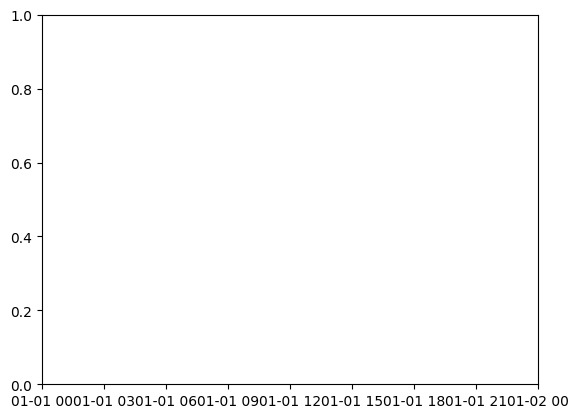

In [132]:
plt.plot(confindex.Date.values,confindex.confidence_index,x_compat=True)